In [7]:
import seaborn as sns
import pandas as pd
import os

In [9]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ os.path.join(path_to_dir,filename) for filename in filenames if filename.endswith( suffix ) ]
files_with_hawk = find_csv_filenames(os.path.join(".","data","with-hawk"))
files_without_hawk = find_csv_filenames(os.path.join(".","data","without-hawk"))

In [28]:
all_df = pd.DataFrame()
for file in files_with_hawk + files_without_hawk:
    df = pd.read_csv(file)
    df["Run"] = int(os.path.basename(file)[0])+1
    df["Hawk"] = os.path.basename(os.path.split(file)[-2])
    df["Second"] = df["Timestamp"] - df["Timestamp"][0]

    all_df = pd.concat([all_df,df])

<Axes: xlabel='timepoint', ylabel='signal'>

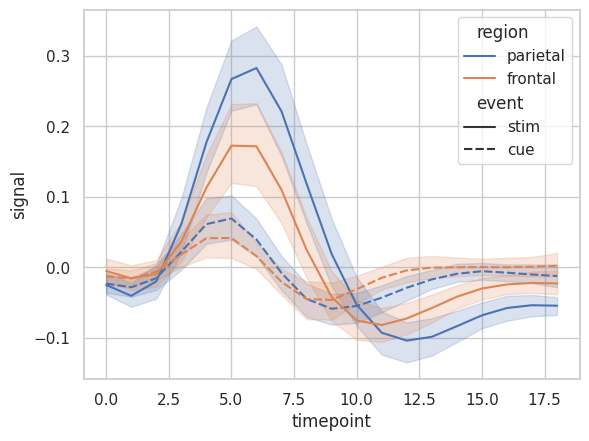

In [29]:

sns.set_theme(style="whitegrid")
sns.lineplot(x="Second", y="Requests/s",
             hue="region", style="event",
             data=fmri)


In [ ]:

all_df = pd.read_csv("data/without-hawk/0_combined.csv")